In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, BatchNormalization

from pytorch_tabnet.tab_model import TabNetClassifier

2023-08-02 11:45:08.354933: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# load data
df = pd.read_csv('data/combined.csv')
x = df.drop('depression', axis=1)
y = df['depression']

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# normalize data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# SMOTE
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

Logistic Regression
ROC AUC:  0.6868252080856124
              precision    recall  f1-score   support

           0       0.94      0.73      0.83       841
           1       0.22      0.64      0.33       100

    accuracy                           0.72       941
   macro avg       0.58      0.69      0.58       941
weighted avg       0.87      0.72      0.77       941


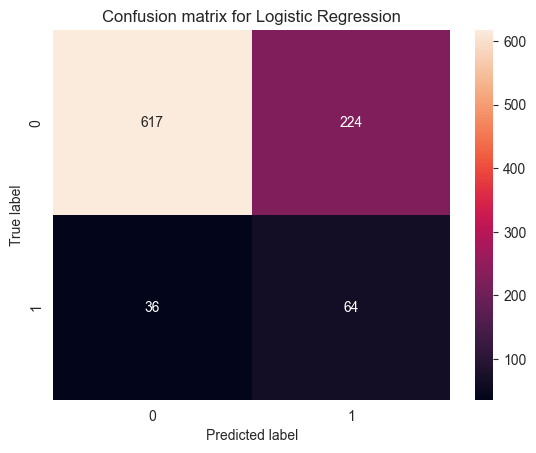

In [4]:
# logistic regression
model1 = LogisticRegression(max_iter=1000)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print('Logistic Regression')
print('ROC AUC: ', roc_auc_score(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

# confusion matrix
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix for Logistic Regression')
plt.show()




SVM
ROC AUC:  0.6884720570749108
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       841
           1       0.24      0.61      0.34       100

    accuracy                           0.75       941
   macro avg       0.59      0.69      0.59       941
weighted avg       0.87      0.75      0.79       941


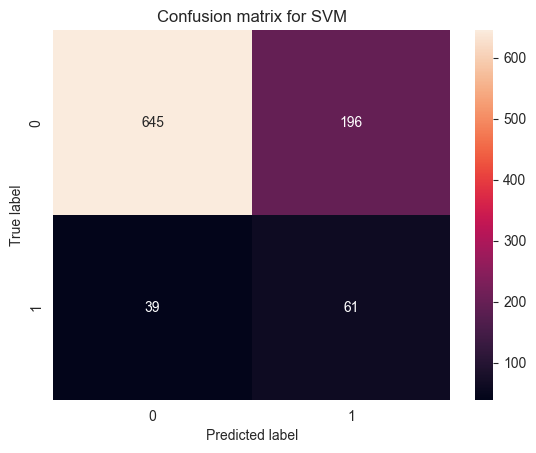

In [5]:
# SVM
model2 = SVC(kernel='poly',degree=4,C=.1)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print('SVM')
print('ROC AUC: ', roc_auc_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

# confusion matrix
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix for SVM')
plt.show()

Random Forest
ROC AUC:  0.664845422116528
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       841
           1       0.28      0.47      0.35       100

    accuracy                           0.82       941
   macro avg       0.61      0.66      0.62       941
weighted avg       0.86      0.82      0.84       941


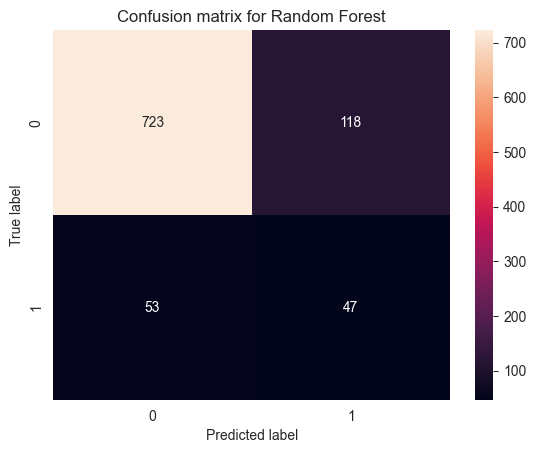

In [6]:
# random forest
model3 = RandomForestClassifier(n_estimators=1000, max_depth=5)
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
print('Random Forest')
print('ROC AUC: ', roc_auc_score(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

# confusion matrix
cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix for Random Forest')
plt.show()

XGBoost
ROC AUC:  0.5513258026159333
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       841
           1       0.36      0.13      0.19       100

    accuracy                           0.88       941
   macro avg       0.63      0.55      0.56       941
weighted avg       0.85      0.88      0.86       941


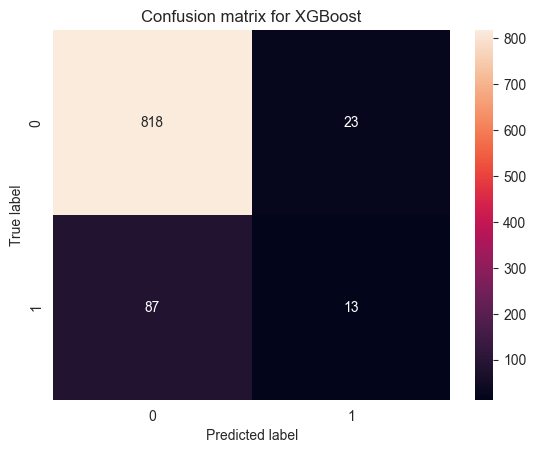

In [7]:
# XGBoost
model4 = xgb.XGBClassifier(objective='binary:logistic', n_estimators=1000, max_depth=10)
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
print('XGBoost')
print('ROC AUC: ', roc_auc_score(y_test, y_pred4))
print(classification_report(y_test, y_pred4))

# confusion matrix
cm = confusion_matrix(y_test, y_pred4)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix for XGBoost')
plt.show()


Epoch 1/100
169/169 [==============================] - 3s 5ms/step - loss: 0.6231 - recall: 0.4339 - val_loss: 0.6424 - val_recall: 0.7108
Epoch 2/100
169/169 [==============================] - 1s 3ms/step - loss: 0.5409 - recall: 0.6144 - val_loss: 0.6132 - val_recall: 0.6960
Epoch 3/100
169/169 [==============================] - 1s 3ms/step - loss: 0.5202 - recall: 0.6193 - val_loss: 0.5134 - val_recall: 0.8203
Epoch 4/100
169/169 [==============================] - 1s 3ms/step - loss: 0.5048 - recall: 0.6553 - val_loss: 0.5437 - val_recall: 0.7574
Epoch 5/100
169/169 [==============================] - 1s 3ms/step - loss: 0.4912 - recall: 0.6746 - val_loss: 0.5076 - val_recall: 0.8010
Epoch 6/100
169/169 [==============================] - 1s 3ms/step - loss: 0.4810 - recall: 0.6790 - val_loss: 0.5743 - val_recall: 0.7212
Epoch 7/100
169/169 [==============================] - 0s 2ms/step - loss: 0.4742 - recall: 0.6859 - val_loss: 0.3989 - val_recall: 0.8646
Epoch 8/100
169/169 [======

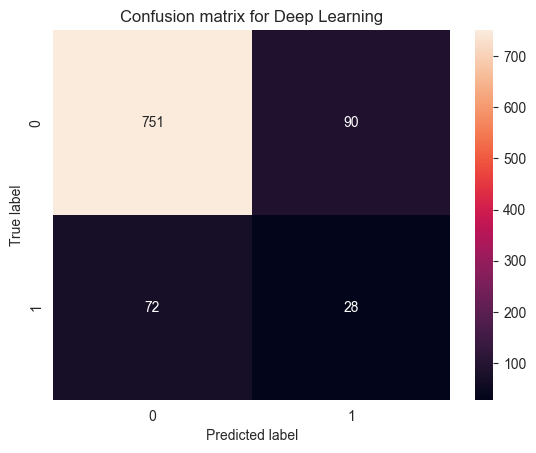

In [8]:
# deep learning
model5 = Sequential(
    [
        Dense(128, activation="relu", input_shape=(x_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(64, activation="relu"),
        BatchNormalization(),
        Dropout(0.2),
        Dense(32, activation="relu"),
        BatchNormalization(),
        Dropout(0.2),
        Dense(16, activation="relu"),
        Dense(1, activation="sigmoid"),
    ]
)

opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model5.compile(loss="binary_crossentropy", optimizer="adam", metrics=['Recall'])
model5.fit(x_train, y_train, epochs=100, batch_size=32,validation_split=0.2)
y_pred5_prob = model5.predict(x_test)
y_pred5 = np.round(y_pred5_prob)
print('Deep Learning')
print('ROC AUC: ', roc_auc_score(y_test, y_pred5))
print(classification_report(y_test, y_pred5))

# confusion matrix
cm = confusion_matrix(y_test, y_pred5)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix for Deep Learning')
plt.show()

/Users/liamlupatin/Documents/הנדסה ביו רפואית/שנה ג׳/סמסטר ו׳/למידה חישובית/פרויקט/Final project/venv/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.87049 | val_0_auc: 0.61525 |  0:00:00s
epoch 1  | loss: 0.83137 | val_0_auc: 0.67493 |  0:00:00s
epoch 2  | loss: 0.81029 | val_0_auc: 0.69146 |  0:00:01s
epoch 3  | loss: 0.79501 | val_0_auc: 0.68891 |  0:00:01s
epoch 4  | loss: 0.76817 | val_0_auc: 0.68943 |  0:00:01s
epoch 5  | loss: 0.75832 | val_0_auc: 0.68185 |  0:00:02s
epoch 6  | loss: 0.73696 | val_0_auc: 0.67043 |  0:00:02s
epoch 7  | loss: 0.72927 | val_0_auc: 0.66853 |  0:00:02s
epoch 8  | loss: 0.71623 | val_0_auc: 0.66741 |  0:00:03s
epoch 9  | loss: 0.69765 | val_0_auc: 0.66667 |  0:00:03s
epoch 10 | loss: 0.70704 | val_0_auc: 0.66421 |  0:00:03s
epoch 11 | loss: 0.69615 | val_0_auc: 0.65745 |  0:00:03s
epoch 12 | loss: 0.693   | val_0_auc: 0.65726 |  0:00:04s
epoch 13 | loss: 0.68286 | val_0_auc: 0.65577 |  0:00:04s
epoch 14 | loss: 0.68218 | val_0_auc: 0.65417 |  0:00:04s
epoch 15 | loss: 0.67709 | val_0_auc: 0.6515  |  0:00:04s
epoch 16 | loss: 0.67401 | val_0_auc: 0.65345 |  0:00:05s
epoch 17 | los

/Users/liamlupatin/Documents/הנדסה ביו רפואית/שנה ג׳/סמסטר ו׳/למידה חישובית/פרויקט/Final project/venv/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


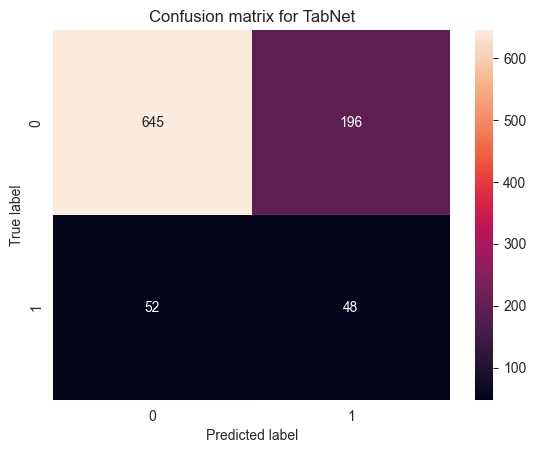

In [9]:
# tabnet
params = {'optimizer_params':dict(lr=0.001)}

# create validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

clf = TabNetClassifier(**params)
clf.fit(x_train, y_train,
        eval_set=[(x_val, y_val)],
        eval_metric=['auc'],max_epochs=500, patience=50)
y_pred6 = clf.predict(x_test)
print('TabNet')
print('ROC AUC: ', roc_auc_score(y_test, y_pred6))
print(classification_report(y_test, y_pred6))

# confusion matrix
cm = confusion_matrix(y_test, y_pred6)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix for TabNet')
plt.show()


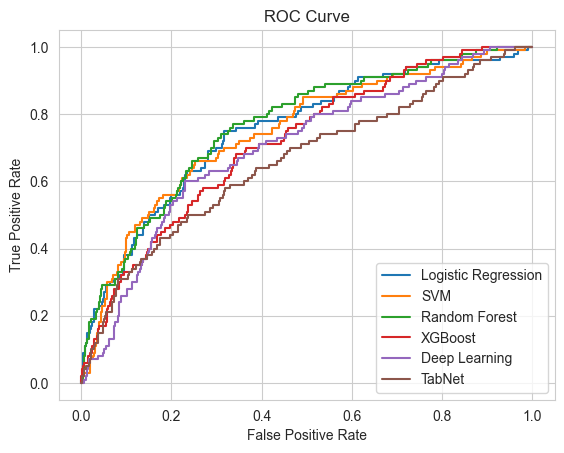

In [10]:
# plot AUC ROC curve
# logistic regression
y_pred_prob1 = model1.predict_proba(x_test)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

# SVM
y_pred_prob2 = model2.decision_function(x_test)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

# random forest
y_pred_prob3 = model3.predict_proba(x_test)[:, 1]
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

# XGBoost
y_pred_prob4 = model4.predict_proba(x_test)[:, 1]
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)

# deep learning
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_pred5_prob)

# tabnet
y_pred_prob6 = clf.predict_proba(x_test)[:, 1]
fpr6, tpr6, thresholds6 = roc_curve(y_test, y_pred_prob6)

# plot ROC curve
plt.plot(fpr1, tpr1, label='Logistic Regression')
plt.plot(fpr2, tpr2, label='SVM')
plt.plot(fpr3, tpr3, label='Random Forest')
plt.plot(fpr4, tpr4, label='XGBoost')
plt.plot(fpr5, tpr5, label='Deep Learning')
plt.plot(fpr6, tpr6, label='TabNet')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
